# Preprocess data

In [11]:
! cp /home/panther/Downloads/praju.txt ./


In [23]:
with open('praju.txt', 'r') as handle:
    whatsapp_messages = handle.readlines()
whatsapp_messages


M - Yashu Urs: <Media omitted>\n',
 '3/27/20, 6:31 PM - +1 (315) 937-6384: 😂\n',
 '3/27/20, 7:10 PM - +91 99020 73366: 🤣\n',
 '3/27/20, 7:26 PM - Lakshmi Sis: https://www.quarantime.in/\n',
 'Enter your pin and know how safe are you? Check out this app which shows the list of quarantined people around you. Keep Calm and Stay Safe! \n',
 'Currently only for Karnataka.\n',
 '3/27/20, 10:10 PM - +91 98861 64835: <Media omitted>\n',
 '3/27/20, 10:49 PM - Sinchana: Gd night\n',
 '3/28/20, 8:18 AM - +91 98861 64835: <Media omitted>\n',
 '3/28/20, 10:01 AM - Sinchana: Gd morning\n',
 '3/28/20, 11:08 AM - Ajay Cousin: *ಉಚಿತವಾಗಿ ಪಡೆಯಿರಿ 499 GB Data ಮತ್ತು Unlimited Free calls 5 ತಿಂಗಳು\n',
 ' \n',
 ' *Click To Get Now* ☞ free2recharge.pw/free\n',
 '3/28/20, 11:19 AM - Lakshmi Sis: https://www.indiatoday.in/technology/news/story/is-reliance-jio-offering-free-recharge-of-rs-498-here-s-the-truth-behind-whatsapp-message-1660290-2020-03-27\n',
 '3/28/20, 2:54 PM - Yashu Urs: <Media omitted>\n',
 '3/28

# Function for date,time,name,message exractor from line

In [30]:
import re
from typing import Union
def handel_void_outputs(Data_extractor_output:str = "")-> Union[list,None]:
    """this function returns a none value if list is empty"""
    if type(Data_extractor_output) == type(re.match('','')):
        if Data_extractor_output.groups()[0] != None:
            return Data_extractor_output.groups()[0]
        else :
            return Data_extractor_output.groups()[1]
    elif Data_extractor_output is None:
        return None
    elif  len(Data_extractor_output) == 0:
        return None
    else:
        return(Data_extractor_output[0])
    
def data_extractor(whatsapp_message:str = "")-> dict: 
    """this function extracts date,time,name,messages"""
    date = handel_void_outputs(re.findall('\d{1}\/\d{2}\/\d{2}|\d{2}\/\d{2}\/\d{2}',whatsapp_message))
    time = handel_void_outputs(re.findall('\d{1}\:\d{2}|\d{2}\:\d{2}',whatsapp_message))
    name = handel_void_outputs(re.search('-\s([\w\s@\-_@\!\*\#]+)|-\s(\+\d{2}\s\d{5}\s\d{5})',whatsapp_message))
    messages = handel_void_outputs(re.findall(':\s[\w\s@\-_\$\@\!\*\#\.\(\)\[\]\>\<\+\&]*.*',whatsapp_message))
    return({'Date':date,'Time':time,'Name_or_number':name,'Messages':messages,})

# Makeing data frame 

In [31]:
import pandas as pd
"""here we are mapping Data_extractor function with whatsapp_messages"""
data_frame_whatsapp_chat = pd.DataFrame(map(data_extractor,whatsapp_messages))
data_frame_whatsapp_chat_without_null_values = data_frame_whatsapp_chat.dropna()
data_frame_whatsapp_chat_without_null_values


,Date,Time,Name_or_number,Messages
179,3/10/20,7:29,+91 98454 71826,: <Media omitted>\n
180,3/10/20,8:17,+91 98861 64835,: <Media omitted>\n
181,3/10/20,8:31,Sinchana,: Gd morning\n
182,3/10/20,9:05,Shekar Dhodapa,: Good morning all\n
183,3/10/20,9:10,Shekar Dhodapa,: <Media omitted>\n
...,...,...,...,...
3613,9/25/20,7:31,Yashu Urs,: Ur rite 👍👍😂😂
3615,9/25/20,8:53,Usha Athe,: <Media omitted>\n
3616,9/25/20,10:23,+91 98861 64835,: <Media omitted>\n
3617,9/25/20,10:27,Sinchana,: Gd night\n


# Most active member in the group

In [32]:
data_frame_whatsapp_chat_without_null_values['Name_or_number'].value_counts()[:1]

Sinchana    326
Name: Name_or_number, dtype: int64

# Most active date in the group

In [33]:
data_frame_whatsapp_chat_without_null_values['Date'].value_counts()[:1]

4/24/20    92
Name: Date, dtype: int64

# Peak chatting time of the day

In [34]:
date_time = data_frame_whatsapp_chat_without_null_values.Date + " "+ data_frame_whatsapp_chat_without_null_values.Time

In [35]:
data_frame_whatsapp_chat_without_null_values['datetimes'] = date_time

In [37]:
data_frame_whatsapp_chat_without_null_values['Date_Time'] = data_frame_whatsapp_chat_without_null_values['Date'] + ' ' + data_frame_whatsapp_chat_without_null_values['Time']
data_frame_whatsapp_chat_without_null_values['datetimes'] = pd.to_datetime(data_frame_whatsapp_chat_without_null_values['Date_Time'])

In [41]:
 b = data_frame_whatsapp_chat_without_null_values.assign(session=pd.cut(data_frame_whatsapp_chat_without_null_values.datetimes.dt.hour,[0,3,7,12,17,19,24],labels=['MidNight','EarlyMorning','Morning','Afternoon','evening','night']))
 b

,Date,Time,Name_or_number,Messages,datetimes,Date_Time,session
179,3/10/20,7:29,+91 98454 71826,: <Media omitted>\n,2020-03-10 07:29:00,3/10/20 7:29,EarlyMorning
180,3/10/20,8:17,+91 98861 64835,: <Media omitted>\n,2020-03-10 08:17:00,3/10/20 8:17,Morning
181,3/10/20,8:31,Sinchana,: Gd morning\n,2020-03-10 08:31:00,3/10/20 8:31,Morning
182,3/10/20,9:05,Shekar Dhodapa,: Good morning all\n,2020-03-10 09:05:00,3/10/20 9:05,Morning
183,3/10/20,9:10,Shekar Dhodapa,: <Media omitted>\n,2020-03-10 09:10:00,3/10/20 9:10,Morning
...,...,...,...,...,...,...,...
3613,9/25/20,7:31,Yashu Urs,: Ur rite 👍👍😂😂,2020-09-25 07:31:00,9/25/20 7:31,EarlyMorning
3615,9/25/20,8:53,Usha Athe,: <Media omitted>\n,2020-09-25 08:53:00,9/25/20 8:53,Morning
3616,9/25/20,10:23,+91 98861 64835,: <Media omitted>\n,2020-09-25 10:23:00,9/25/20 10:23,Morning
3617,9/25/20,10:27,Sinchana,: Gd night\n,2020-09-25 10:27:00,9/25/20 10:27,Morning


In [42]:
b.session.value_counts()

Morning         1359
EarlyMorning     344
MidNight         141
night              0
evening            0
Afternoon          0
Name: session, dtype: int64

# Most deactive person in the group among who messaged atlest once

In [43]:
number_of_messages_per_person = data_frame_whatsapp_chat_without_null_values['Name_or_number'].value_counts()
min_no_of_messages = min(number_of_messages_per_person)
most_deactive_member = number_of_messages_per_person[number_of_messages_per_person==min_no_of_messages]
list(most_deactive_member.keys())

['Kumar Dhodapa']

# Average messages in a day

In [44]:
data_frame_whatsapp_chat_without_null_values['Date'].value_counts().mean()

12.63013698630137

# person who sends more emojies

In [45]:
import emoji
messages =  list(data_frame_whatsapp_chat_without_null_values['Messages'].values)
def extract_emojis(s):
    return [c for c in s if c in emoji.UNICODE_EMOJI]
emojies_in_chat = list(map(extract_emojis,messages))
emojies_in_chat


[[],
 [],
 [],
 [],
 [],
 [],
 ['👇'],
 ['😂', '😂'],
 [],
 ['🤣', '🤣'],
 ['😂', '😂'],
 [],
 ['😆', '😆'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['😂', '😂'],
 ['🤣', '🤣', '🤣'],
 ['😂', '😂'],
 [],
 ['😂', '😂'],
 [],
 [],
 [],
 [],
 [],
 ['🤣', '🤣'],
 ['😀', '😀', '😀', '😀'],
 [],
 [],
 [],
 ['🌞', '🌞'],
 ['🤩', '🤩'],
 [],
 [],
 [],
 ['🤣', '🤣', '🤣', '😁', '😁', '😁'],
 ['😉'],
 [],
 [],
 ['😳', '😳'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['🎊', '🥳', '🥳'],
 ['💐', '💐', '😍'],
 ['🥰', '💖'],
 [],
 ['💐', '🎉', '🎊', '🎁', '🎈'],
 [],
 ['🎉'],
 ['😍', '🎂', '🎂', '👍', '🏻'],
 [],
 [],
 ['🎂', '🎈', '🎉'],
 [],
 ['🤗', '😘'],
 [],
 [],
 [],
 [],
 [],
 ['👌', '👍', '👍'],
 ['👌', '👌'],
 [],
 ['😂', '😁'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['😄', '😄'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['😷'],
 [],
 [],
 [],
 [],
 [],
 [],
 []

In [46]:
"""here we are creating new column emojies """
data_frame_whatsapp_chat_without_null_values['emojies'] = emojies_in_chat

In [47]:
"""here we are using groupby function to find how many emojies sent by each person"""
data_frame_whatsapp_chat_without_null_values['number_of_emojies'] = data_frame_whatsapp_chat_without_null_values['emojies'].apply(lambda x : len(x))
sum_of_emojies = data_frame_whatsapp_chat_without_null_values.groupby("Name_or_number")['number_of_emojies'].sum()
sum_of_emojies.sort_values(ascending = False)

Name_or_number
Sinchana           141
+91 99020 73366     94
Ajay Cousin         87
Pavan bro           80
Yashu Urs           64
+91 98454 71826     60
+91 86603 28471     51
Lakshmi Sis         43
Roopa Akka          28
+91 70193 25807     26
Vijay @cousin        9
Prajwal              9
Shekar Dhodapa       4
Bharath Dhodapa      3
Appa@                2
Amma Jio             0
Sam Athge            0
+91 98861 64835      0
Usha Athe            0
Kumar Dhodapa        0
Name: number_of_emojies, dtype: int64

In [48]:
emoji_data_frame = pd.DataFrame(sum_of_emojies)

In [49]:
emoji_data_frame.sort_values("number_of_emojies",ascending=False)

,number_of_emojies
Name_or_number,
Sinchana,141
+91 99020 73366,94
Ajay Cousin,87
Pavan bro,80
Yashu Urs,64
+91 98454 71826,60
+91 86603 28471,51
Lakshmi Sis,43
Roopa Akka,28


# word cloud

In [50]:
"""here we deleted messages which includes multi media content and urls"""
data_frame_whatsapp_chat_without_null_values['messages_without'] = data_frame_whatsapp_chat_without_null_values['Messages'].apply(lambda x : "\u200b" in x or ': <Media omitted>\n' in x or 'https' in x )

In [51]:
""" here we are extracting the messages which doesnot contains multi media content and urls and make it has list and then joining the text"""
import string
text = " ".join(data_frame_whatsapp_chat_without_null_values[data_frame_whatsapp_chat_without_null_values['messages_without'] == False]['Messages'].apply(lambda x : x.strip(string.punctuation+string.whitespace)).tolist())
text

"Gd morning Good morning all This is what Corona virus has done to the Airline industry👇 😂😂 🤣🤣 😂😂 😆😆 Gd night Due to shortage and expensive rates of mask. Organic mask 😂😂 🤣🤣🤣 When you are trying to reach someone urgently😂😂 😂😂 Gd  night Dear HR Good morning all 🤣🤣 😀😀😀😀 If you press one it will stop Gd morning Good morning 🌞 everyone 🌞 🤩🤩 Reply from HR Roopa madam 🤣🤣🤣😁😁😁 😉 😳😳 Gd night Good morning all At this rate .......China will b back in action very soon, maybe much faster than the world expects Gd night Good morning Good morning Gd morning Good morning all All mothers beware of momorona virus. Virus affects only mothers as kids are staying longer at home and are not allowed outside Gd night Good morning all Good morning Good morning all Good morning Good morning Happy birthday rishaan🎊🥳🥳 Happy birthday Rishaan. God bless💐💐😍 Happy birthday rishaan🥰💖 Happy birthday Rishan💐🎉🎊🎁🎈 Happybirthday Rishaan. God bless Happy birthday  🎉 rishaan Happy birthday Hero 😍🎂🎂👍🏻 Usha Happy birthday 🎂🎈🎉 

In [52]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud) a.   
   

SyntaxError: invalid syntax (<ipython-input-52-cc812787cb22>, line 18)

# timespan

In [53]:
d =  data_frame_whatsapp_chat_without_null_values['datetimes'] 
starting_date = d.min()
last_date = d.max()
starting_date,

(Timestamp('2020-03-10 01:18:00'),)

In [54]:
last_date

Timestamp('2020-09-25 10:31:00')

In [55]:
data_frame_whatsapp_chat_without_null_values['year'] = pd.DatetimeIndex(data_frame_whatsapp_chat_without_null_values['Date']).year
data_frame_whatsapp_chat_without_null_values['month'] = pd.DatetimeIndex(data_frame_whatsapp_chat_without_null_values['Date']).month

In [56]:
moth_year = data_frame_whatsapp_chat_without_null_values['Month'].astype(str) + "-" + data_frame_whatsapp_chat_without_null_values['year'].astype(str)

KeyError: 'Month'

In [57]:
data_frame_whatsapp_chat_without_null_values['Month_year'] = moth_year

NameError: name 'moth_year' is not defined

In [86]:
data_frame_whatsapp_chat_without_null_values


,Date,Time,Name_or_number,Messages,datetimes,Date_Time,emojies,number_of_emojies,messages_without,year,month,Moth_year,Month_year
2,19/05/20,14:13,Srinivasa,: <Media omitted>\n,2020-05-19 14:13:00,19/05/20 14:13,[],0,True,2020,5,5-2020,5-2020
3,20/05/20,15:17,etheshama,: <Media omitted>\n,2020-05-20 15:17:00,20/05/20 15:17,[],0,True,2020,5,5-2020,5-2020
4,20/05/20,15:17,etheshama,: <Media omitted>\n,2020-05-20 15:17:00,20/05/20 15:17,[],0,True,2020,5,5-2020,5-2020
5,20/05/20,15:17,etheshama,: <Media omitted>\n,2020-05-20 15:17:00,20/05/20 15:17,[],0,True,2020,5,5-2020,5-2020
6,20/05/20,15:17,etheshama,: <Media omitted>\n,2020-05-20 15:17:00,20/05/20 15:17,[],0,True,2020,5,5-2020,5-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,10/09/20,15:14,Sameer,: This message was deleted\n,2020-09-10 15:14:00,10/09/20 15:14,[],0,False,2020,10,10-2020,10-2020
1307,10/09/20,15:20,Mohan Chari,: <Media omitted>\n,2020-09-10 15:20:00,10/09/20 15:20,[],0,True,2020,10,10-2020,10-2020
1308,10/09/20,19:17,Lover Boy,: This message was deleted\n,2020-09-10 19:17:00,10/09/20 19:17,[],0,False,2020,10,10-2020,10-2020
1309,10/09/20,19:18,Beeresh Mech,: Nimmelaraa atmakke Shanti sigliii.....\n,2020-09-10 19:18:00,10/09/20 19:18,[],0,False,2020,10,10-2020,10-2020


In [101]:
data_frame_whatsapp_chat_without_null_values['Month'] =  data_frame_whatsapp_chat_without_null_values["datetimes"].apply(lambda x: x.strftime("%b"))


In [93]:
Month_year = data_frame_whatsapp_chat_without_null_values['Month'].astype(str) + "-" + data_frame_whatsapp_chat_without_null_values['year'].astype(str)

In [94]:
data_frame_whatsapp_chat_without_null_values['Month_year']

In [95]:
data_frame_whatsapp_chat_without_null_values

,Date,Time,Name_or_number,Messages,datetimes,Date_Time,emojies,number_of_emojies,messages_without,year,month,Moth_year,Month_year,Month
2,19/05/20,14:13,Srinivasa,: <Media omitted>\n,2020-05-19 14:13:00,19/05/20 14:13,[],0,True,2020,5,5-2020,May-2020,May
3,20/05/20,15:17,etheshama,: <Media omitted>\n,2020-05-20 15:17:00,20/05/20 15:17,[],0,True,2020,5,5-2020,May-2020,May
4,20/05/20,15:17,etheshama,: <Media omitted>\n,2020-05-20 15:17:00,20/05/20 15:17,[],0,True,2020,5,5-2020,May-2020,May
5,20/05/20,15:17,etheshama,: <Media omitted>\n,2020-05-20 15:17:00,20/05/20 15:17,[],0,True,2020,5,5-2020,May-2020,May
6,20/05/20,15:17,etheshama,: <Media omitted>\n,2020-05-20 15:17:00,20/05/20 15:17,[],0,True,2020,5,5-2020,May-2020,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,10/09/20,15:14,Sameer,: This message was deleted\n,2020-09-10 15:14:00,10/09/20 15:14,[],0,False,2020,10,10-2020,Sep-2020,Sep
1307,10/09/20,15:20,Mohan Chari,: <Media omitted>\n,2020-09-10 15:20:00,10/09/20 15:20,[],0,True,2020,10,10-2020,Sep-2020,Sep
1308,10/09/20,19:17,Lover Boy,: This message was deleted\n,2020-09-10 19:17:00,10/09/20 19:17,[],0,False,2020,10,10-2020,Sep-2020,Sep
1309,10/09/20,19:18,Beeresh Mech,: Nimmelaraa atmakke Shanti sigliii.....\n,2020-09-10 19:18:00,10/09/20 19:18,[],0,False,2020,10,10-2020,Sep-2020,Sep


In [123]:
(data_frame_whatsapp_chat_without_null_values.groupby(["Month_year"])["Messages"].count()).values



array([553, 169, 107, 248,  13])

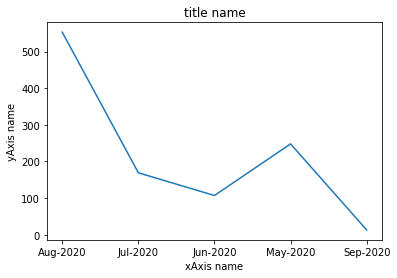

In [124]:
import matplotlib.pyplot as plt
m = (data_frame_whatsapp_chat_without_null_values.groupby(["Month_year"])["Messages"].count()).keys()
mess = (data_frame_whatsapp_chat_without_null_values.groupby(["Month_year"])["Messages"].count()).values
plt.plot(m,mess)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()